In [ ]:
pip install tensorflow

In [ ]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os, glob

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import pandas as pd

from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model

from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout,GlobalAveragePooling2D


from tensorflow.keras.callbacks import Callback, EarlyStopping
from tensorflow.keras.applications import ResNet50


from tensorflow.keras.applications.resnet50 import preprocess_input


from sklearn.metrics import classification_report

In [ ]:
file_path =  '/content/drive/MyDrive/skin-dataset/dataset/Train'


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
name_class = os.listdir(file_path)
print(name_class)


['squamous cell carcinoma', 'vascular lesion', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'basal cell carcinoma', 'actinic keratosis', 'melanoma', 'dermatofibroma']


In [ ]:
filepaths=list(glob.glob(file_path+'/**/*.*'))

In [ ]:
filepaths

['/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0024710.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0025808.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0025831.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0025696.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0025331.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0025069.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0025577.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0025247.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0024923.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Train/squamous cell carcinoma/ISIC_0025358.jpg',
 '/content/drive/MyDrive/skin-dataset/dataset/Trai

In [ ]:
lables=list(map(lambda x: os.path.split(os.path.split(x)[0])[1],filepaths))
lables

['squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carcinoma',
 'squamous cell carc

In [ ]:
filepath = pd.Series (filepaths, name='Filepath').astype(str)

lables = pd.Series(lables, name='Label')

data = pd.concat([filepath, lables], axis=1)

data = data.sample(frac=1).reset_index(drop=True)

data.head(5)

,Filepath,Label
0,/content/drive/MyDrive/skin-dataset/dataset/Tr...,squamous cell carcinoma
1,/content/drive/MyDrive/skin-dataset/dataset/Tr...,basal cell carcinoma
2,/content/drive/MyDrive/skin-dataset/dataset/Tr...,basal cell carcinoma
3,/content/drive/MyDrive/skin-dataset/dataset/Tr...,actinic keratosis
4,/content/drive/MyDrive/skin-dataset/dataset/Tr...,melanoma


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'pigmented benign keratosis'),
  Text(1, 0, 'melanoma'),
  Text(2, 0, 'basal cell carcinoma'),
  Text(3, 0, 'nevus'),
  Text(4, 0, 'squamous cell carcinoma'),
  Text(5, 0, 'vascular lesion'),
  Text(6, 0, 'actinic keratosis'),
  Text(7, 0, 'dermatofibroma'),
  Text(8, 0, 'seborrheic keratosis')])

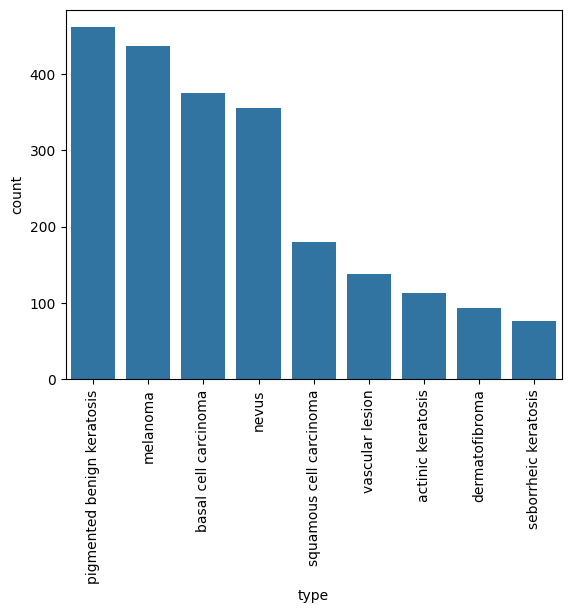

In [ ]:
count = data.Label.value_counts()
sns.barplot(x=count.index,y=count)
plt.xlabel('type')
plt.xticks(rotation=90)

In [ ]:
train , test = train_test_split(data,test_size=0.2,random_state=42)

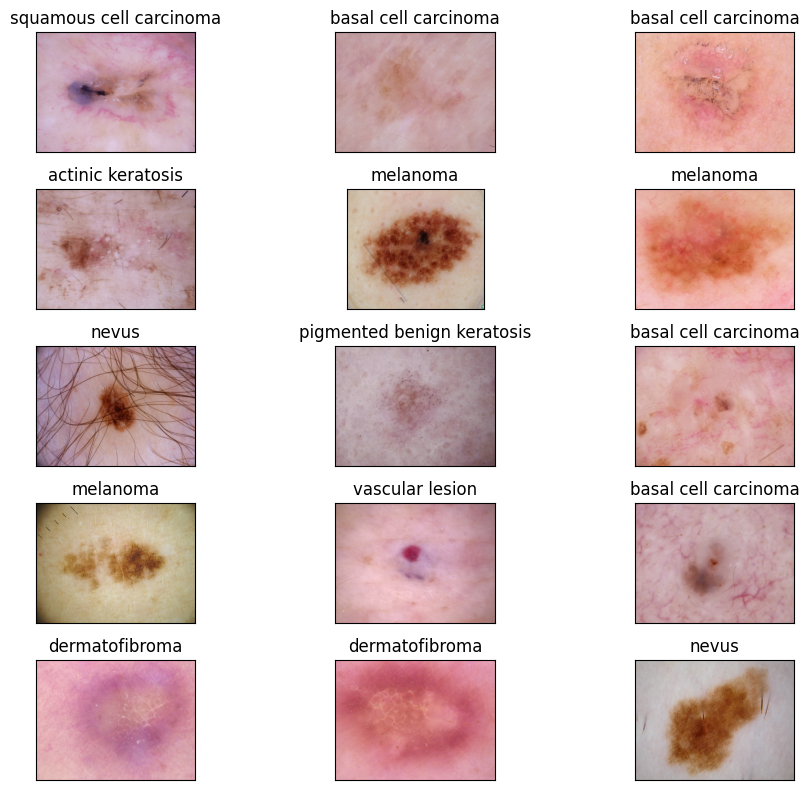

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=3, figsize=(10,8), subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(data.Filepath[i]))
    ax.set_title(data.Label[i])

plt.tight_layout()

plt.show()

In [ ]:
train_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)
test_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [ ]:
train_gen =train_datagen.flow_from_dataframe(

    dataframe=train,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode= 'categorical',
    batch_size =32,
    shuffle= True,
    seed =42)


valid_gen =train_datagen.flow_from_dataframe(

    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode= 'categorical',
    batch_size =32,
    shuffle= False,
    seed =42)



test_gen =test_datagen.flow_from_dataframe(

    dataframe=test,
    x_col='Filepath',
    y_col='Label',
    target_size=(100,100),
    class_mode= 'categorical',
    batch_size =32,
    shuffle= False,
    seed =42)


Found 1784 validated image filenames belonging to 9 classes.
Found 446 validated image filenames belonging to 9 classes.
Found 446 validated image filenames belonging to 9 classes.


In [ ]:
num_classes = 9

In [ ]:
pretrained_model=ResNet50(
    input_shape=(100,100,3),
    include_top=False,
    weights='imagenet',
    pooling='avg'

)
pretrained_model.trainable= False

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
inputs=pretrained_model.input
x= Dense(128,activation="relu")(pretrained_model.output)
x= Dense(128,activation="relu")(x)
outputs = Dense(9,activation='softmax')(x)
model=Model(inputs=inputs,outputs=outputs)

In [ ]:
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

#     # Freeze the layers in the base model to prevent them from being updated during training
# for layer in base_model.layers:
#         layer.trainable = False

#     # Add custom classification layers on top of the ResNet50 base
# x = base_model.output
# x = GlobalAveragePooling2D()(x)
# x = Dense(1024, activation='relu')(x)
# predictions = Dense(num_classes, activation='softmax')(x)

#     # Define the final model
# model = Model(inputs=base_model.input, outputs=predictions)

In [ ]:
# Create the ResNet50 model


# Compile the model
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print model summary
model.summary()

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)  │ (None, 100, 100, 3)    │              0 │ -                      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_pad (ZeroPadding2D) │ (None, 106, 106, 3)    │              0 │ input_layer[0][0]      │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 50, 50, 64)     │          9,472 │ conv1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 50, 50, 64)     │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 50, 50, 64)     │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pad (ZeroPadding2D) │ (None, 52, 52, 64)     │              0 │ conv1_relu[0][0]       │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1_pool (MaxPooling2D) │ (None, 25, 25, 64)     │              0 │ pool1_pad[0][0]        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 25, 25, 64)     │          4,160 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 25, 25, 64)     │            256 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 25, 25, 64)     │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 25, 25, 64)     │         36,928 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_bn         │ (None, 25, 25, 64)     │            256 │ conv2_block1_2_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_relu       │ (None, 25, 25, 64)     │              0 │ conv2_block1_2_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_conv       │ (None, 25, 25, 256)    │         16,640 │ pool1_pool[0][0]       │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_3_conv       │ (None, 25, 25, 256)    │         16,640 │ conv2_block1_2_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├──────────────────────

 Total params: 23,867,657 (91.05 MB)

 Trainable params: 279,945 (1.07 MB)

 Non-trainable params: 23,587,712 (89.98 MB)

In [ ]:
my_callbacks = [EarlyStopping (monitor='val_accuracy',

min_delta=0, patience=2,

mode='auto')]

In [ ]:
history = model.fit(

train_gen, validation_data=valid_gen, epochs=300)

Epoch 1/300


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


56/56 ━━━━━━━━━━━━━━━━━━━━ 460s 7s/step - accuracy: 0.3573 - loss: 1.9088 - val_accuracy: 0.5717 - val_loss: 1.3753
Epoch 2/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 194s 3s/step - accuracy: 0.6088 - loss: 1.1468 - val_accuracy: 0.5673 - val_loss: 1.3318
Epoch 3/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 146s 3s/step - accuracy: 0.6593 - loss: 0.9505 - val_accuracy: 0.5493 - val_loss: 1.3185
Epoch 4/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 188s 2s/step - accuracy: 0.7091 - loss: 0.8172 - val_accuracy: 0.5830 - val_loss: 1.2223
Epoch 5/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 125s 2s/step - accuracy: 0.7884 - loss: 0.6268 - val_accuracy: 0.5471 - val_loss: 1.3511
Epoch 6/300
56/56 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7797 - loss: 0.6305

In [ ]:

model.save("model_resnet_400.h5")

In [ ]:
# model = load_model("model_resnet_300.h5")

In [ ]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()

pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [ ]:
results = model.evaluate(test_gen, verbose=0)

print("Test Loss: {:.5f}".format(results[0]))
print("Test Accuracy: {:.2f}%".format(results[1] * 100))

In [ ]:
# Predict the label of the test_gen
pred = model.predict(test_gen)
pred = np.argmax(pred,axis=1)

#  Map the label
labels = (train_gen.class_indices)
labels = dict((v,k) for k,v in labels.items())
pred = [labels[k] for k in pred]

In [ ]:
y_test = list(test.Label)
print(classification_report(y_test, pred))

In [ ]:
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(12,8),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(test.Filepath.iloc[i]))
    ax.set_title(f"True: {test.Label.iloc[i]}\nPredicted: {pred[i]}")
plt.tight_layout()
plt.show()

In [ ]:
#!pip install opencv-python
#import cv2
#import numpy as np
#from matplotlib.pyplot import imread
#from matplotlib.pyplot import imshow
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.imagenet_utils import decode_predictions
#from tensorflow.keras.applications.imagenet_utils import preprocess_input

#img_path = 'basal.jpg'

#img = cv2.imread(img_path)
#img = cv2.resize(img, (100,100))

#x = np.expand_dims(img, axis=0)
#x = preprocess_input(x)
#result = model.predict(x)
#print((result*100).astype('int'))



In [ ]:
from tensorflow.keras.models import load_model
model = load_model("model_resnet_300.h5")
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
import cv2
import numpy as np
from matplotlib.pyplot import imread
from matplotlib.pyplot import imshow
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.imagenet_utils import decode_predictions
from tensorflow.keras.applications.imagenet_utils import preprocess_input

img_path = 'nevus.jpg'

img = cv2.imread(img_path)
img = cv2.resize(img, (100,100))

x = np.expand_dims(img, axis=0)
x = preprocess_input(x)
result = model.predict(x)
print(result)
print((result*100).astype('int'))

plt.imshow(img)

In [ ]:
p= list((result*100).astype('int'))
pp= list(p[0])
print(pp)

In [ ]:
print("Largest Element is:", max(pp))

In [ ]:
index = pp.index(max(pp))

In [ ]:
#index=2

In [ ]:
# name_class= ['vascular lesion' , 'pigmented benign keratosis' , 'dermatofibroma' , 'melanoma' , 'nevus' , 'basal cell carcinoma' , 'seborrheic keratosis' , 'squamous cell carcinoma' , 'actinic keratosis']

In [ ]:
name_class= ['actinic keratosis' , 'basal cell carcinoma' , 'dermatofibroma' , 'melanoma' , 'nevus' , 'pigmented benign keratosis' , 'seborrheic keratosis' , 'squamous cell carcinoma' , 'vascular lesion']

In [ ]:
name_class[index]

In [ ]:
plt.title(name_class[index])
plt.imshow(img)

In [ ]:
def preprocess_image(img):
    img = img.resize((224, 224))  # Resize image to match ResNet50 input size
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    return x

In [ ]:
# Function to handle file upload and perform inference
def handle_upload(change):
    uploaded_file = change.new
    img = Image.open(io.BytesIO(uploaded_file[0]['content']))
    img_preprocessed = preprocess_image(img)
    predictions = model.predict(img_preprocessed)
    decoded_predictions = decode_predictions(predictions, top=3)[0]
    for i, (imagenet_id, label, score) in enumerate(decoded_predictions):
        print("{}. {}: {:.2f}%".format(i + 1, label, score * 100))



In [ ]:
uploader = widgets.FileUpload(accept='image/*', multiple=False)
uploader.observe(handle_upload, names='value')

# Display the file upload widget
display(uploader)

In [ ]:
pd.DataFrame(history.history) [['accuracy', 'val accuracy']].plot()
plt.title("Accuracy")

plt.show()

pd.DataFrame(history.history) [['loss', 'val_loss']].plot()
plt.title("Loss")

plt.show()

In [ ]:
results model.evaluate(test gen, verbose=0)

print(" Test Less: (:.5f)".format(results[0]))

print("Test Accuracy: (:.2f}".format(results[1] 100))

In [ ]:
pred model.predict(test_gen)

pred np.argmax(pred, axis-1)

Map the label

labels (train_gen.class_indices)

labels = dict((v.k) for k.v in labels.items())

pred [labels[k] for k in pred]

In [ ]:
fig.axes plt.subplots (nrows=5, ncols=2, figsize=(12, 8).


subplot kw['xticks': [], 'yticks': []})

for 1, ax in enumerate(axes.flat):

ax.imshow(plt.inread(test.Filepath.iloc[i])) ax.set titlelf-True: (test.Label.iloc[i]}\nPredicted: (pred[1]}")

plt.tight layout()

plt.show